In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

In [ ]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_1946.jpg', 'with_mask_3390.jpg', 'with_mask_2826.jpg', 'with_mask_1000.jpg', 'with_mask_2699.jpg']
['with_mask_1894.jpg', 'with_mask_3128.jpg', 'with_mask_3688.jpg', 'with_mask_2218.jpg', 'with_mask_3701.jpg']


In [ ]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_372.jpg', 'without_mask_3013.jpg', 'without_mask_2435.jpg', 'without_mask_1933.jpg', 'without_mask_3417.jpg']
['without_mask_3344.jpg', 'without_mask_3619.jpg', 'without_mask_2919.jpg', 'without_mask_3768.jpg', 'without_mask_3637.jpg']


In [ ]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


In [ ]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [ ]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


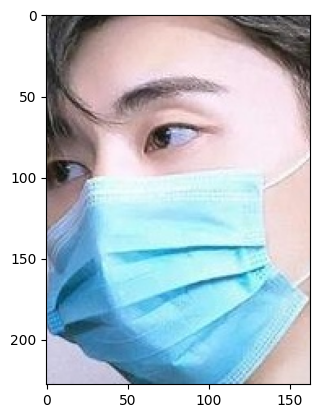

In [ ]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

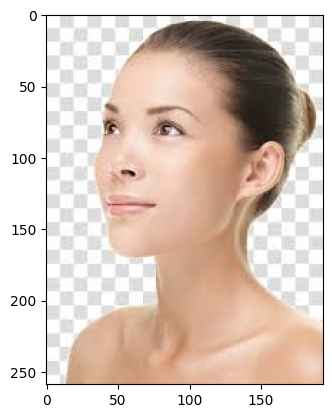

In [ ]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


array([[[242, 237, 240],
        [244, 241, 240],
        [246, 246, 241],
        ...,
        [243, 243, 236],
        [244, 246, 242],
        [245, 248, 247]],

       [[245, 242, 244],
        [242, 240, 239],
        [247, 247, 242],
        ...,
        [246, 241, 247],
        [250, 243, 251],
        [250, 239, 251]],

       [[245, 245, 246],
        [246, 246, 244],
        [243, 244, 239],
        ...,
        [248, 243, 246],
        [247, 237, 241],
        [249, 236, 242]],

       ...,

       [[244, 243, 243],
        [155, 157, 158],
        [129, 134, 139],
        ...,
        [250, 252, 250],
        [249, 249, 246],
        [245, 243, 239]],

       [[238, 239, 245],
        [227, 229, 233],
        [239, 241, 241],
        ...,
        [246, 245, 251],
        [251, 248, 250],
        [247, 243, 241]],

       [[239, 237, 244],
        [241, 238, 241],
        [243, 241, 235],
        ...,
        [142, 143, 155],
        [201, 202, 206],
        [250, 250, 247]]], dtype=uint8)
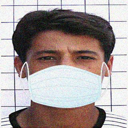

In [ ]:
data[0]

In [ ]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [ ]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255


array([[[216, 216, 216],
        [216, 216, 216],
        [216, 216, 216],
        ...,
        [171, 173, 163],
        [173, 177, 170],
        [178, 185, 177]],

       [[216, 216, 216],
        [216, 216, 216],
        [216, 216, 216],
        ...,
        [172, 173, 164],
        [173, 177, 170],
        [178, 185, 177]],

       [[217, 217, 217],
        [217, 217, 217],
        [217, 217, 217],
        ...,
        [172, 174, 164],
        [173, 177, 170],
        [178, 185, 177]],

       ...,

       [[189, 191, 180],
        [190, 192, 181],
        [191, 192, 182],
        ...,
        [172, 168, 171],
        [170, 167, 170],
        [168, 167, 172]],

       [[186, 188, 177],
        [187, 189, 178],
        [188, 189, 179],
        ...,
        [174, 170, 170],
        [170, 167, 171],
        [167, 167, 170]],

       [[184, 186, 175],
        [185, 187, 176],
        [186, 187, 177],
        ...,
        [174, 170, 170],
        [170, 167, 170],
        [167, 167, 169]]], dtype=uint8)
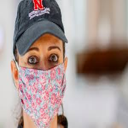

In [ ]:
X_train[0]

In [ ]:
X_train_scaled[0]

array([[[    0.84706,     0.84706,     0.84706],
        [    0.84706,     0.84706,     0.84706],
        [    0.84706,     0.84706,     0.84706],
        ...,
        [    0.67059,     0.67843,     0.63922],
        [    0.67843,     0.69412,     0.66667],
        [    0.69804,     0.72549,     0.69412]],

       [[    0.84706,     0.84706,     0.84706],
        [    0.84706,     0.84706,     0.84706],
        [    0.84706,     0.84706,     0.84706],
        ...,
        [    0.67451,     0.67843,     0.64314],
        [    0.67843,     0.69412,     0.66667],
        [    0.69804,     0.72549,     0.69412]],

       [[    0.85098,     0.85098,     0.85098],
        [    0.85098,     0.85098,     0.85098],
        [    0.85098,     0.85098,     0.85098],
        ...,
        [    0.67451,     0.68235,     0.64314],
        [    0.67843,     0.69412,     0.66667],
        [    0.69804,     0.72549,     0.69412]],

       ...,

       [[    0.74118,     0.74902,     0.70588],
        [  

In [ ]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [ ]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 11s 23ms/step - loss: 0.5122 - acc: 0.7894 - val_loss: 0.3116 - val_acc: 0.8744
Epoch 2/5
170/170 [==============================] - 3s 17ms/step - loss: 0.3028 - acc: 0.8784 - val_loss: 0.2460 - val_acc: 0.8909
Epoch 3/5
170/170 [==============================] - 3s 19ms/step - loss: 0.2339 - acc: 0.9106 - val_loss: 0.2370 - val_acc: 0.8992
Epoch 4/5
170/170 [==============================] - 5s 27ms/step - loss: 0.2131 - acc: 0.9204 - val_loss: 0.1882 - val_acc: 0.9190
Epoch 5/5
170/170 [==============================] - 3s 17ms/step - loss: 0.1681 - acc: 0.9402 - val_loss: 0.1679 - val_acc: 0.9223


In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 1s 11ms/step - loss: 0.2052 - acc: 0.9206
Test Accuracy = 0.9205824136734009


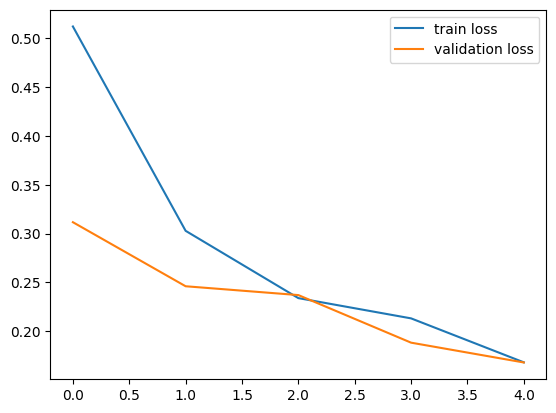

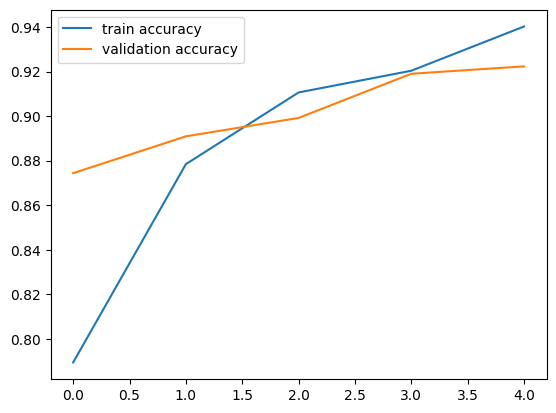

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Path of the image to be predicted: /content/wm.png


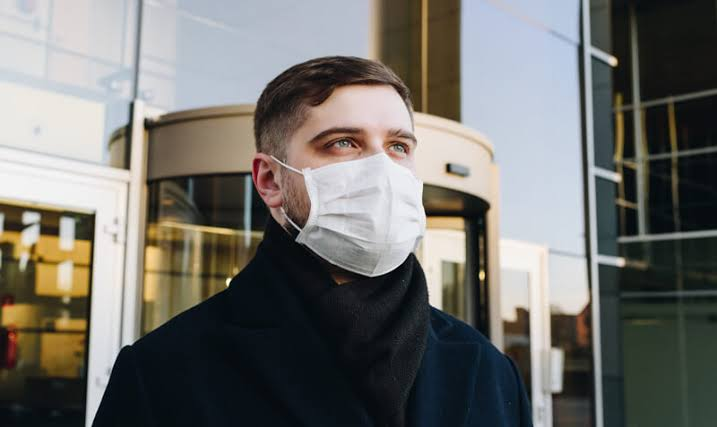

1/1 [==============================] - 0s 32ms/step
[[    0.18737     0.71999]]
1
The person in the image is wearing a mask


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/wmm.png


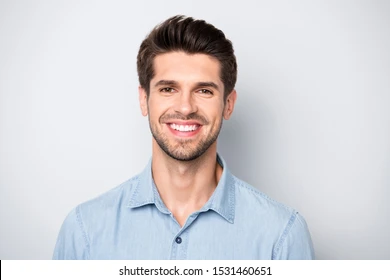

1/1 [==============================] - 0s 18ms/step
[[    0.64418     0.43079]]
0
The person in the image is not wearing a mask


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

#Exception (When there is a person with a mask and a person without mask)

Path of the image to be predicted: /content/Man without mask.jpg


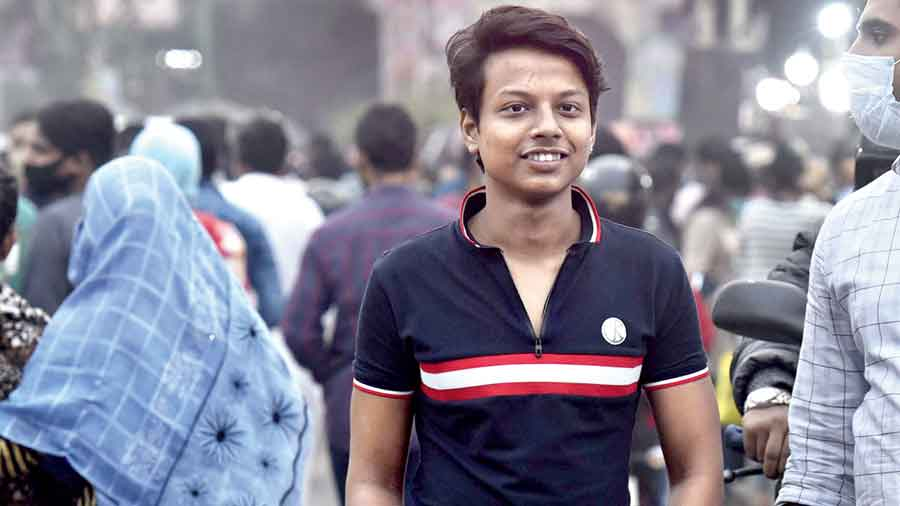

1/1 [==============================] - 0s 380ms/step
[[    0.38827     0.52327]]
1
The person in the image is wearing a mask


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')